In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비


In [4]:
# --------------------
# 실습용 데이터 생성
# --------------------

from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

df = pd.DataFrame(features, columns=['feature1','feature2'])
df.head(3)

,feature1,feature2
0,-1.692427,3.622025
1,0.697940,4.428867
2,1.100228,4.606317


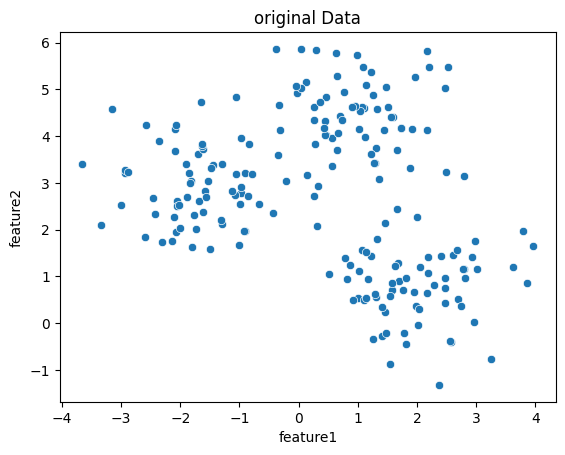

In [6]:
# --------------------
# 데이터 시각화
# --------------------
sns.scatterplot( x='feature1', y='feature2', data=df)
plt.title('original Data');

### 전처리

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled

,feature1,feature2
0,-1.226105,0.541123
1,0.155288,1.019338
2,0.387771,1.124513
3,-1.085269,0.400190
4,0.454017,1.574123
...,...,...
195,1.460554,-1.585668
196,-1.446681,0.910670
197,1.360482,-0.923195
198,0.460873,0.540225


### 군집화

In [21]:
# --------------------
# 클러스터링 모델 객체 생성
# --------------------

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

# --------------------
# 학습 
# --------------------

model.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


## 클러스터링 결과
- 개별 데이터의 군집 결과 : `모델.labels_`
- 클러스터의 중심 : `모델.cluster_centers_`
- 이너셔 : `모델.inertia_`

In [22]:
# --------------------
# 개별 데이터의 군집 label
# --------------------

model.labels_


array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1], dtype=int32)

In [23]:
# --------------------
# 데이터프레임에 군집화 결과인 cluster 컬럼 추가
# --------------------

X_scaled['cluster'] = model.labels_
X_scaled

,feature1,feature2,cluster
0,-1.226105,0.541123,2
1,0.155288,1.019338,0
2,0.387771,1.124513,0
3,-1.085269,0.400190,2
4,0.454017,1.574123,0
...,...,...,...
195,1.460554,-1.585668,1
196,-1.446681,0.910670,2
197,1.360482,-0.923195,1
198,0.460873,0.540225,0


In [24]:
# --------------------
# 클러스터의 중심
# --------------------

model.cluster_centers_

array([[ 0.30639353,  1.03324875],
       [ 0.88326502, -1.12531839],
       [-1.23985212,  0.11221514]])

<Axes: xlabel='feature1', ylabel='feature2'>

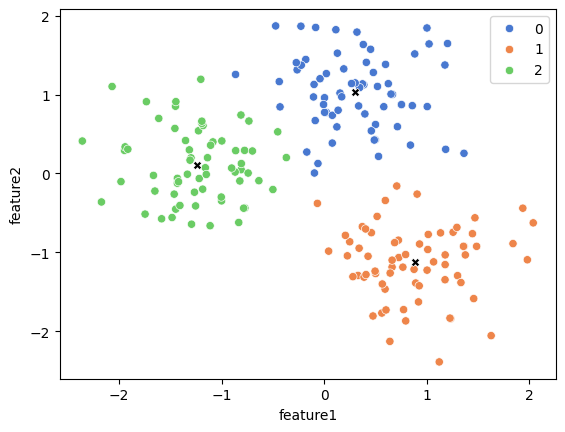

In [26]:
# --------------------
# 군집화 결과 시각화
# --------------------

sns.scatterplot(x='feature1', y='feature2', data=X_scaled, hue='cluster', palette='muted')

# --------------------
# 개별 군집의 중심 좌표
# --------------------

sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], marker='X', color='black')



In [27]:
# --------------------
# 이너셔 
# 클러스터 중심과 클러스터에 속한 샘플 사이의 거리 제곱 합
#  - 클러스터의 샘플이 얼마나 가깝게 있는지를 나타내는 값
# --------------------

model.inertia_

82.28027879566409

### elbow 방법
- 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법

In [33]:
inertia = []

for i in range(2,8) :
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)
    iner = model.inertia_
    print(iner)
    inertia.append(iner)

316.2117915755855
82.28027879566409
71.68393201031118
64.4946275532062
54.626351918121536
49.264517187657994


In [34]:
inertia

[316.2117915755855,
 82.28027879566409,
 71.68393201031118,
 64.4946275532062,
 54.626351918121536,
 49.264517187657994]

<Axes: >

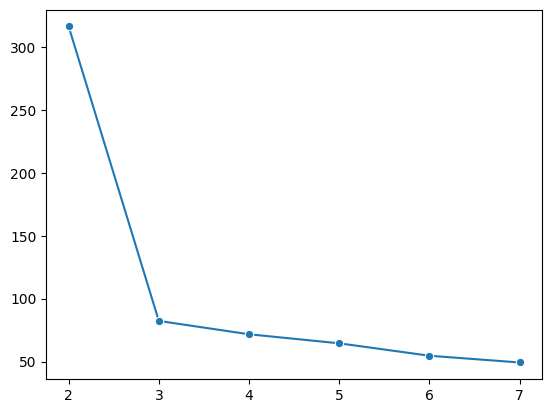

In [40]:
sns.lineplot(x=range(2,8), y=inertia, marker='o')

### 실루엣 분석
- 실루엣 계수 
    - 군집화의 품질을 평가하는 지표
    - 자신의 군집에 얼마나 잘 속해있는지, 다른 군집과는 얼마나 잘 분리되어있는지 측정
    - -1~1 
        - 1에 가까울수록 근처의 군집과 더 멀이 떨어져있다는 의미
        - 0에 가까울수록 가까운 군집과 가까워진다는 의미
        - -값은 다른 군집에 데이터포인트가 할당되었음을 의미
- 개별 실루엣 계수 : `silhouette_samples(features, cluster)`
- 평균 실루엣 계수 : `silhouette_score(features, cluster)`

In [43]:
# ----------------
# 개별 실루엣 계수
# ----------------

from sklearn.metrics import silhouette_samples, silhouette_score

s = silhouette_samples(X_scaled, model.labels_)
X_scaled['silhouette'] = s
X_scaled

,feature1,feature2,cluster,silhouette
0,-1.226105,0.541123,2,0.717021
1,0.155288,1.019338,0,0.107978
2,0.387771,1.124513,0,0.117461
3,-1.085269,0.400190,2,0.725636
4,0.454017,1.574123,0,0.399830
...,...,...,...,...
195,1.460554,-1.585668,1,0.158074
196,-1.446681,0.910670,2,0.604020
197,1.360482,-0.923195,1,0.584474
198,0.460873,0.540225,0,0.462810


In [44]:
# ------------------
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
# ------------------

X_scaled.loc[X_scaled['silhouette']<0]

,feature1,feature2,cluster,silhouette
46,0.004378,0.960296,0,-0.053668


In [48]:
# ------------------
# 클러스터의 중심에 있는 데이터
# ------------------

X_scaled.groupby(by='cluster')['silhouette'].idxmax()

cluster
0    101
1     94
2    163
Name: silhouette, dtype: int64

In [ ]:
# ------------------
# 평균 실루엣 계수
# ------------------

silhouette_score(X_scaled, model.labels_)

0.39506337674751996

In [56]:
# ------------------
# 최적의 실루엣 찾기
# ------------------

for i in range(2,8) :
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, model.labels_)
    print(f'k={i} ==> {sil_score}')

k=2 ==> 0.4435430659066624
k=3 ==> 0.6622420981773521
k=4 ==> 0.5413884304672224
k=5 ==> 0.4247136446189002
k=6 ==> 0.4171238939504307
k=7 ==> 0.415634126955368


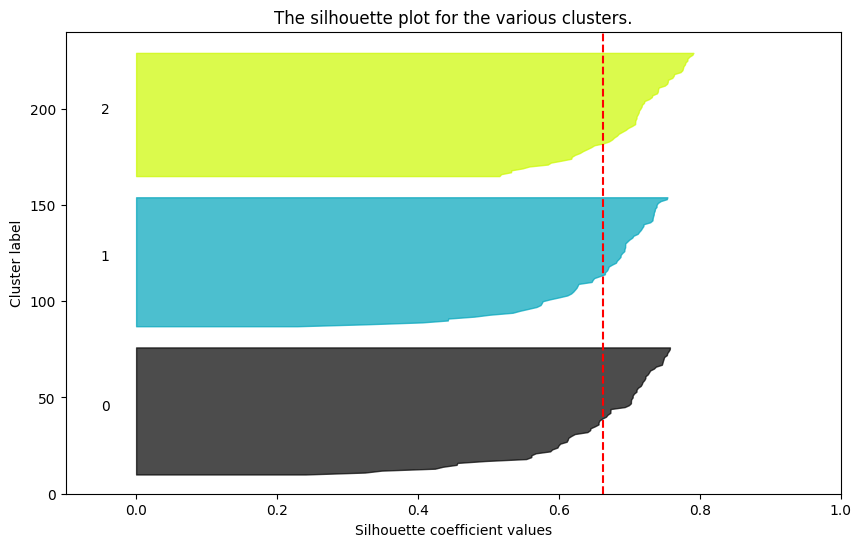

In [52]:
# ------------------
# 실루엣 그래프
#  - 각 군집 내에서 실루엣 계수를 정렬하여 순서대로 그린 그래프
# ------------------

from silhouette_analysis import silhouette_plot

silhouette_plot(X_scaled, 3)

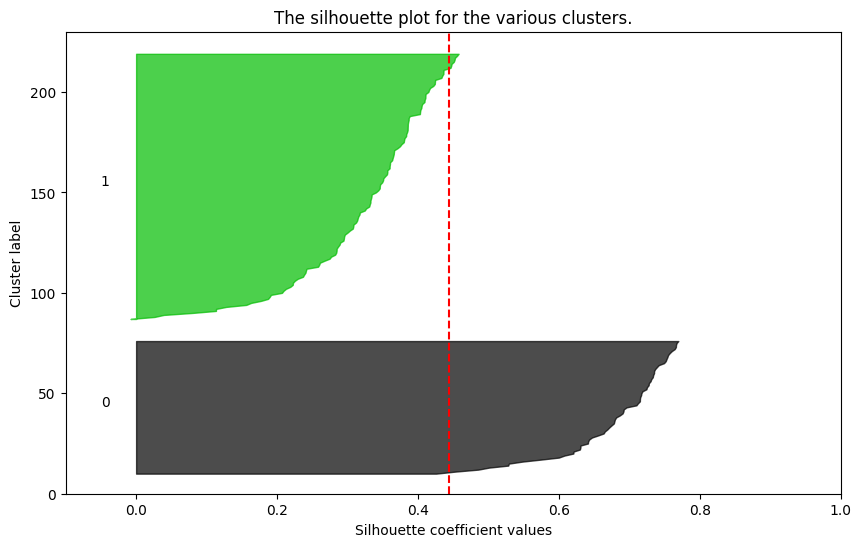

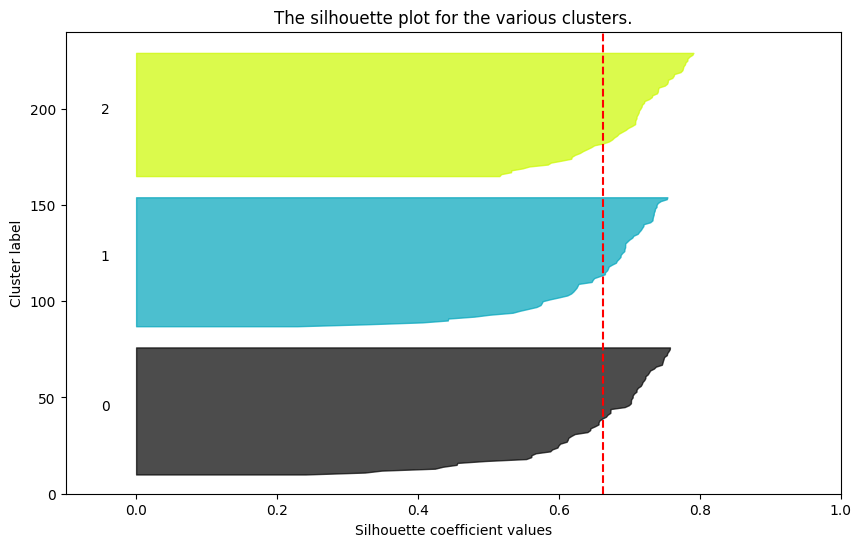

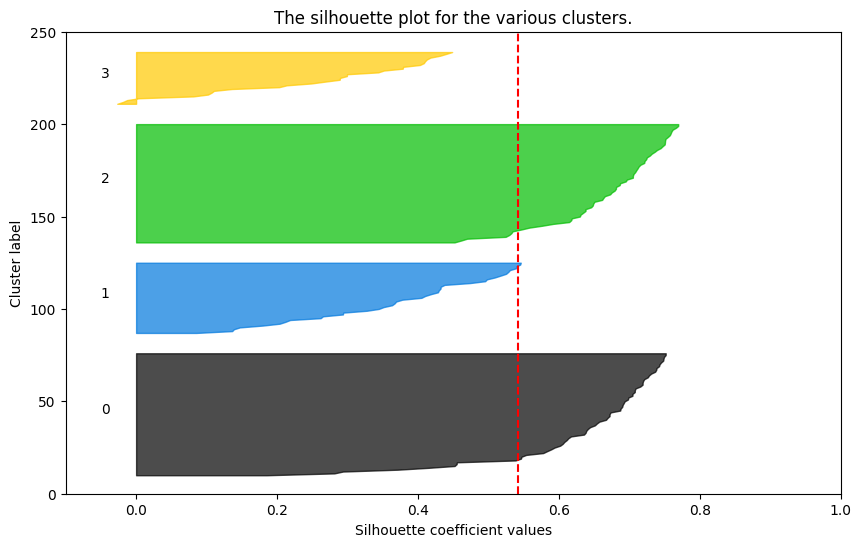

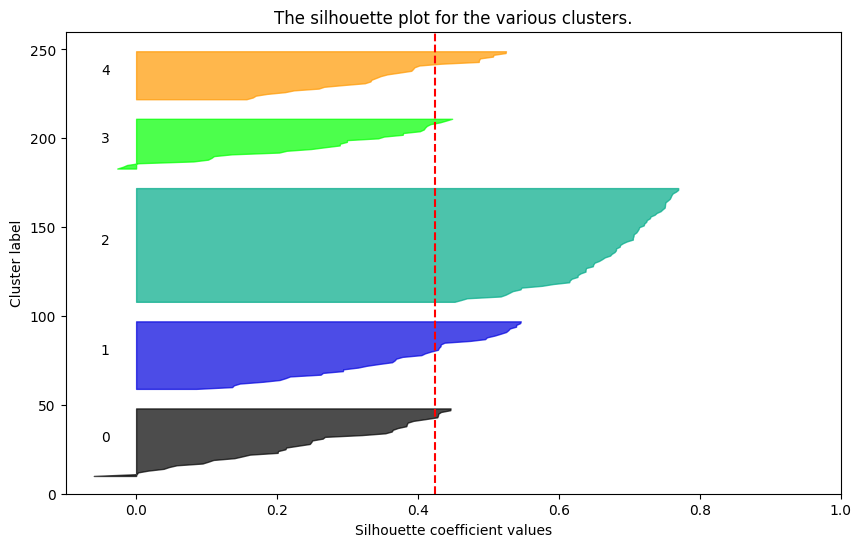

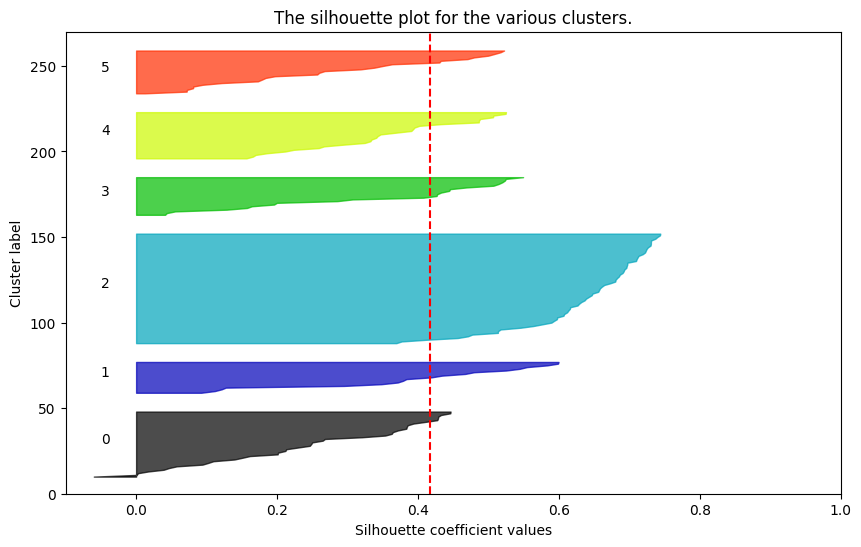

In [57]:
# ------------------
# 실루엣 그래프
#  - 각 군집 내에서 실루엣 계수를 정렬하여 순서대로 그린 그래프
# ------------------

from silhouette_analysis import silhouette_plot

for k in range(2,7):
    silhouette_plot(X_scaled, k)